# West Nile Virus in Chicago: Investigation of `spray.csv`
---

## Content
---

- [Locations](../code/99_Locations.ipynb)
- [Data Cleaning Summary](../code/01_Data_Cleaning.ipynb) 
- [Train-test Investigation](../code/01a_Train_Test_Investigation.ipynb) 
- [Weather Investigation](../code/01b_Weather_Investigation.ipynb) 
- [Spray Investigation](../code/01c_Spray_Investigation.ipynb) **Current Notebook**
- [Feature Engineering](../code/02a_Feature_Engineering.ipynb)
- [Combined EDA and Preprocessing](../code/02b_Combined_EDA_and_Preprocessing.ipynb)
- [Model Tuning & Conclusion](../code/03_Model_Tuning_&_Conclusion.ipynb)

## Import Library
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from itertools import chain

# Import graph style
plt.style.use('fivethirtyeight')

# Set the max rows and columns for Pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

## CSV
---

In [ ]:
# load CSV data
spray = pd.read_csv('../assets/spray.csv')
train = pd.read_csv('../assets/cleaned_train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']].values
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

## EDA
---

In [ ]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [ ]:
train.head()

,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,NumMosquitos_sum
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,0,1.0
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,0,1.0
4,2007-05-29,CULEX RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,0,4.0


In [ ]:
spray.info()

In [ ]:
# spray.loc[:,'Date'] = pd.to_datetime(spray.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
# spray.loc[:,'Time'] = pd.to_datetime(spray.loc[:,'Time'], format='%I:%M:%S %p', errors='raise')

In [ ]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [ ]:
spray.shape

(14835, 4)

In [ ]:
#Presence of null value within the data. All of the null data resides in the Time Column
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [ ]:
#Percentage of missing/null value data within Spray dataset
round(spray.isnull().sum().sum() / spray.shape[0] * 100, 2)

3.94

#### Unique values within Spray dataset

In [ ]:
#spray data is only avaliable for the year 2011 and 2013
print('Number of days that spray was used: {}'.format(spray['Date'].nunique()))
spray['Date'].value_counts()

Number of days that spray was used: 10


2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [ ]:
# There seems to be duplicated enteries indicated in the time column
spray['Time'].value_counts()

7:44:32 PM     541
8:57:56 PM       5
9:38:27 PM       5
9:31:27 PM       5
9:37:27 PM       5
              ... 
12:07:58 AM      1
8:23:54 PM       1
7:00:58 PM       1
9:48:21 PM       1
7:28:33 PM       1
Name: Time, Length: 8583, dtype: int64

In [ ]:
#Number of duplicates in the top value is similar to the one in Time column, further investigation required.
spray['Latitude'].value_counts()

41.986460    541
41.995396     11
41.982772     10
41.994484      9
41.985652      9
            ... 
41.899682      1
41.944358      1
41.729532      1
41.959322      1
41.945437      1
Name: Latitude, Length: 12887, dtype: int64

In [ ]:
#Number of duplicates in the top value is similar to the one in Time & Longitude column, further investigation required.
spray['Longitude'].value_counts()

-87.794225    541
-87.806911      9
-87.806863      9
-87.816751      7
-87.805711      6
             ... 
-87.805135      1
-87.789482      1
-87.758925      1
-87.706100      1
-87.710575      1
Name: Longitude, Length: 13007, dtype: int64

In [ ]:
#There are a total of 534 rows worth of duplicates within the dataset.
spray[spray.duplicated(keep=False)]

,Date,Time,Latitude,Longitude
484,2011-09-07,7:43:40 PM,41.983917,-87.793088
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
489,2011-09-07,7:44:32 PM,41.986460,-87.794225
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
...,...,...,...,...
1025,2011-09-07,7:44:32 PM,41.986460,-87.794225
1026,2011-09-07,7:44:32 PM,41.986460,-87.794225
1027,2011-09-07,7:44:32 PM,41.986460,-87.794225
1028,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [ ]:
#Percentage of duplicated spray data
round(spray[spray.duplicated(keep=False)].shape[0] / spray.shape[0] * 100, 2)

3.66

## Initial Observation
---

The spray data contains 3.94% missing data, all of it resides within Time column. Based on CDC reports, the aearial spray targets the mosquito at two stages. One targets the mosquito at the larvea stage while the other at the adult stage. While there are around 584 rows worth of missing time in the data, these data would be crucial to determine if the spray is effective against adult mosquito during the dusk and dawn timing where they are the most active. <br> 
Besides that, there are also 3.66% of duplicated data. The data will require futher analysis to determine if it will be dropped or not.


In [ ]:
# There are multiple enteries to the spray data which contains the same date, time, latitude and longitude
# This may be due to log entry error which duplicates of these data will be dropped.
spray.loc[(spray["Time"] == "7:44:32 PM") & (spray["Latitude"] == 41.986460) & (spray["Longitude"]== -87.794225)]

,Date,Time,Latitude,Longitude
489,2011-09-07,7:44:32 PM,41.98646,-87.794225
490,2011-09-07,7:44:32 PM,41.98646,-87.794225
491,2011-09-07,7:44:32 PM,41.98646,-87.794225
492,2011-09-07,7:44:32 PM,41.98646,-87.794225
493,2011-09-07,7:44:32 PM,41.98646,-87.794225
...,...,...,...,...
1025,2011-09-07,7:44:32 PM,41.98646,-87.794225
1026,2011-09-07,7:44:32 PM,41.98646,-87.794225
1027,2011-09-07,7:44:32 PM,41.98646,-87.794225
1028,2011-09-07,7:44:32 PM,41.98646,-87.794225


## Data Cleaning for Spray
---


In [ ]:
spray1 = spray.drop_duplicates(keep='first')

In [ ]:
spray1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14294 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14294 non-null  object 
 1   Time       13710 non-null  object 
 2   Latitude   14294 non-null  float64
 3   Longitude  14294 non-null  float64
dtypes: float64(2), object(2)
memory usage: 558.4+ KB


Text(0.5, 0, 'Date of Spray')

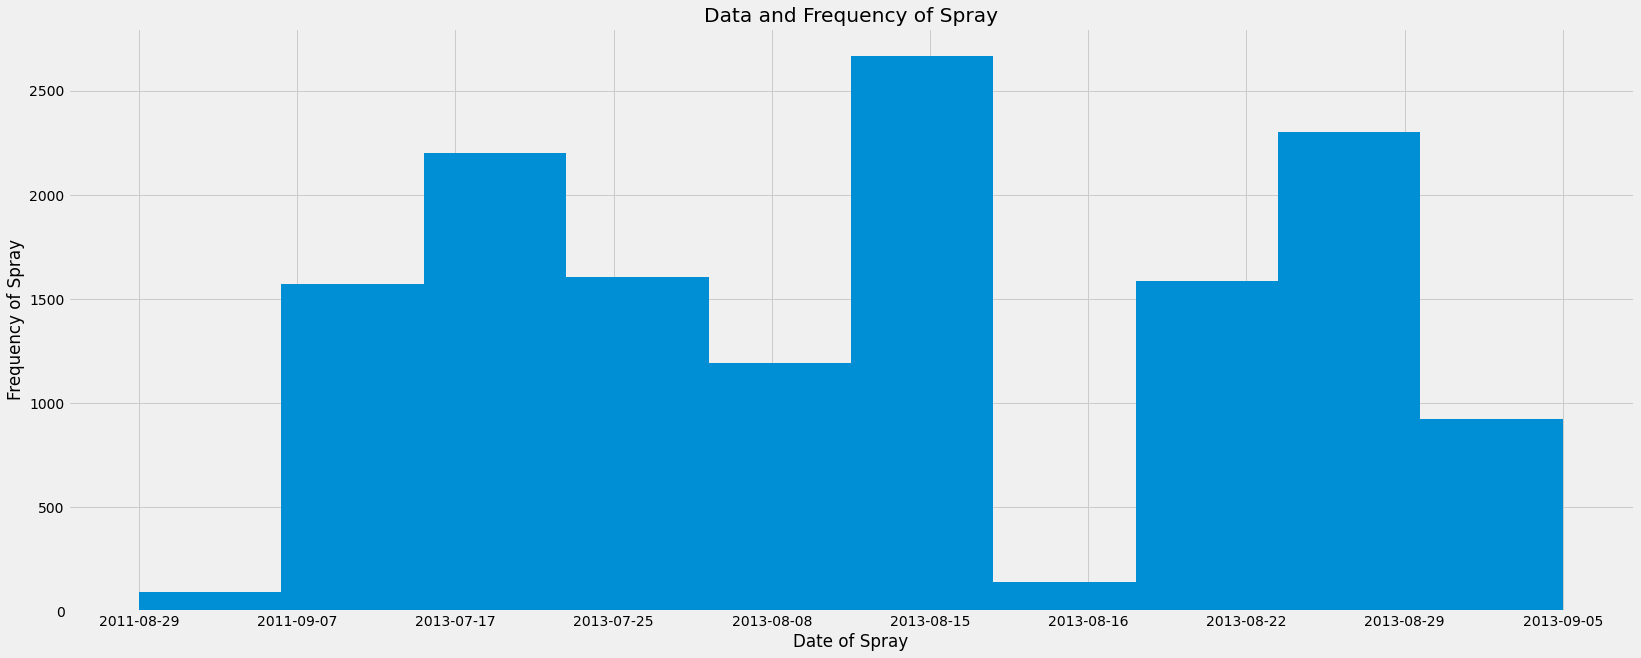

In [ ]:
plt.figure(figsize=(25,10))
plt.hist(spray1['Date'])
plt.title('Data and Frequency of Spray')
plt.ylabel('Frequency of Spray')
plt.xlabel('Date of Spray')

In [ ]:
a = stats.mode(spray1['Time'])
a

ModeResult(mode=array(['9:35:47 PM'], dtype=object), count=array([5]))

In [ ]:
spray1['Time'].isnull().sum()

584

In [ ]:
spray1['Time'].fillna('9:35:47 PM', inplace=True)

/opt/venv/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Feature Engineering
---

(1) To include data two weeks after spray date for comparison on reduction of mosquito 

In [ ]:
spray1.loc[:,'Date'] = pd.to_datetime(spray1.loc[:,'Date'], format='%Y-%m-%d', errors='raise')

/opt/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
spray1['7Daysfterspray'] = spray1['Date'] + timedelta(days=7)
spray1['14Daysfterspray'] = spray1['Date'] + timedelta(days=14)
spray1['21Daysfterspray'] = spray1['Date'] + timedelta(days=21)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [ ]:
spray1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14294 entries, 0 to 14834
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             14294 non-null  datetime64[ns]
 1   Time             14294 non-null  object        
 2   Latitude         14294 non-null  float64       
 3   Longitude        14294 non-null  float64       
 4   7Daysfterspray   14294 non-null  datetime64[ns]
 5   14Daysfterspray  14294 non-null  datetime64[ns]
 6   21Daysfterspray  14294 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(2), object(1)
memory usage: 893.4+ KB


In [ ]:
spray1.head()

,Date,Time,Latitude,Longitude,7Daysfterspray,14Daysfterspray,21Daysfterspray
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-09-05,2011-09-12,2011-09-19
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-09-05,2011-09-12,2011-09-19
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-09-05,2011-09-12,2011-09-19
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-09-05,2011-09-12,2011-09-19
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-09-05,2011-09-12,2011-09-19


In [ ]:
spray1['Time'].value_counts()

9:35:47 PM    589
9:40:27 PM      5
8:55:36 PM      5
9:38:27 PM      5
8:58:56 PM      5
             ... 
8:23:54 PM      1
7:00:58 PM      1
9:48:21 PM      1
9:17:51 PM      1
7:28:33 PM      1
Name: Time, Length: 8583, dtype: int64

In [ ]:
# spray1.to_csv('../assets/spray_cleaned.csv', index = False)

### Spray and Trap plot(Overall)
---

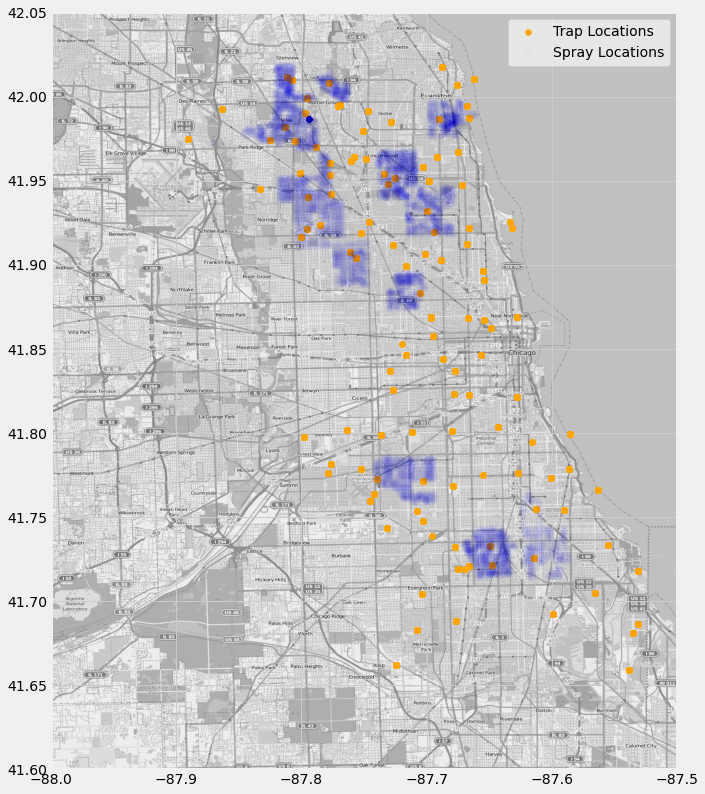

In [ ]:
spray_plot = spray[['Date','Longitude', 'Latitude']].values
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.05)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

trap_mask = (train[:,2] >= lon_lat_box[0])
trap_mask = (train[:,2] <= lon_lat_box[1]) & trap_mask
trap_mask = (train[:,3] >= lon_lat_box[2]) & trap_mask
trap_mask = (train[:,3] <= lon_lat_box[3]) & trap_mask

spray_mask = (spray_plot[:,1] >= lon_lat_box[0])
spray_mask = (spray_plot[:,1] <= lon_lat_box[1]) & spray_mask
spray_mask = (spray_plot[:,2] >= lon_lat_box[2]) & spray_mask
spray_mask = (spray_plot[:,2] <= lon_lat_box[3]) & spray_mask

plt.scatter(train[trap_mask][:,2], train[trap_mask][:,3], marker='o',\
            color='orange', label='Trap Locations')
plt.scatter(spray_plot[spray_mask][:,1], spray_plot[spray_mask][:,2], marker='o',\
            color='blue', label='Spray Locations', alpha=.01)

plt.legend()

### Spray and Trap ( by dates)
---

In [ ]:
spray_dates = list(set(spray_plot[:,0]))
spray_dates.sort()

spray_by_date = dict()

for date in spray_dates:
    spray_mask_tmp = spray_mask & (spray_plot[:,0] == date)
    spray_data = spray_plot[spray_mask_tmp]
    spray_by_date[date] = spray_data

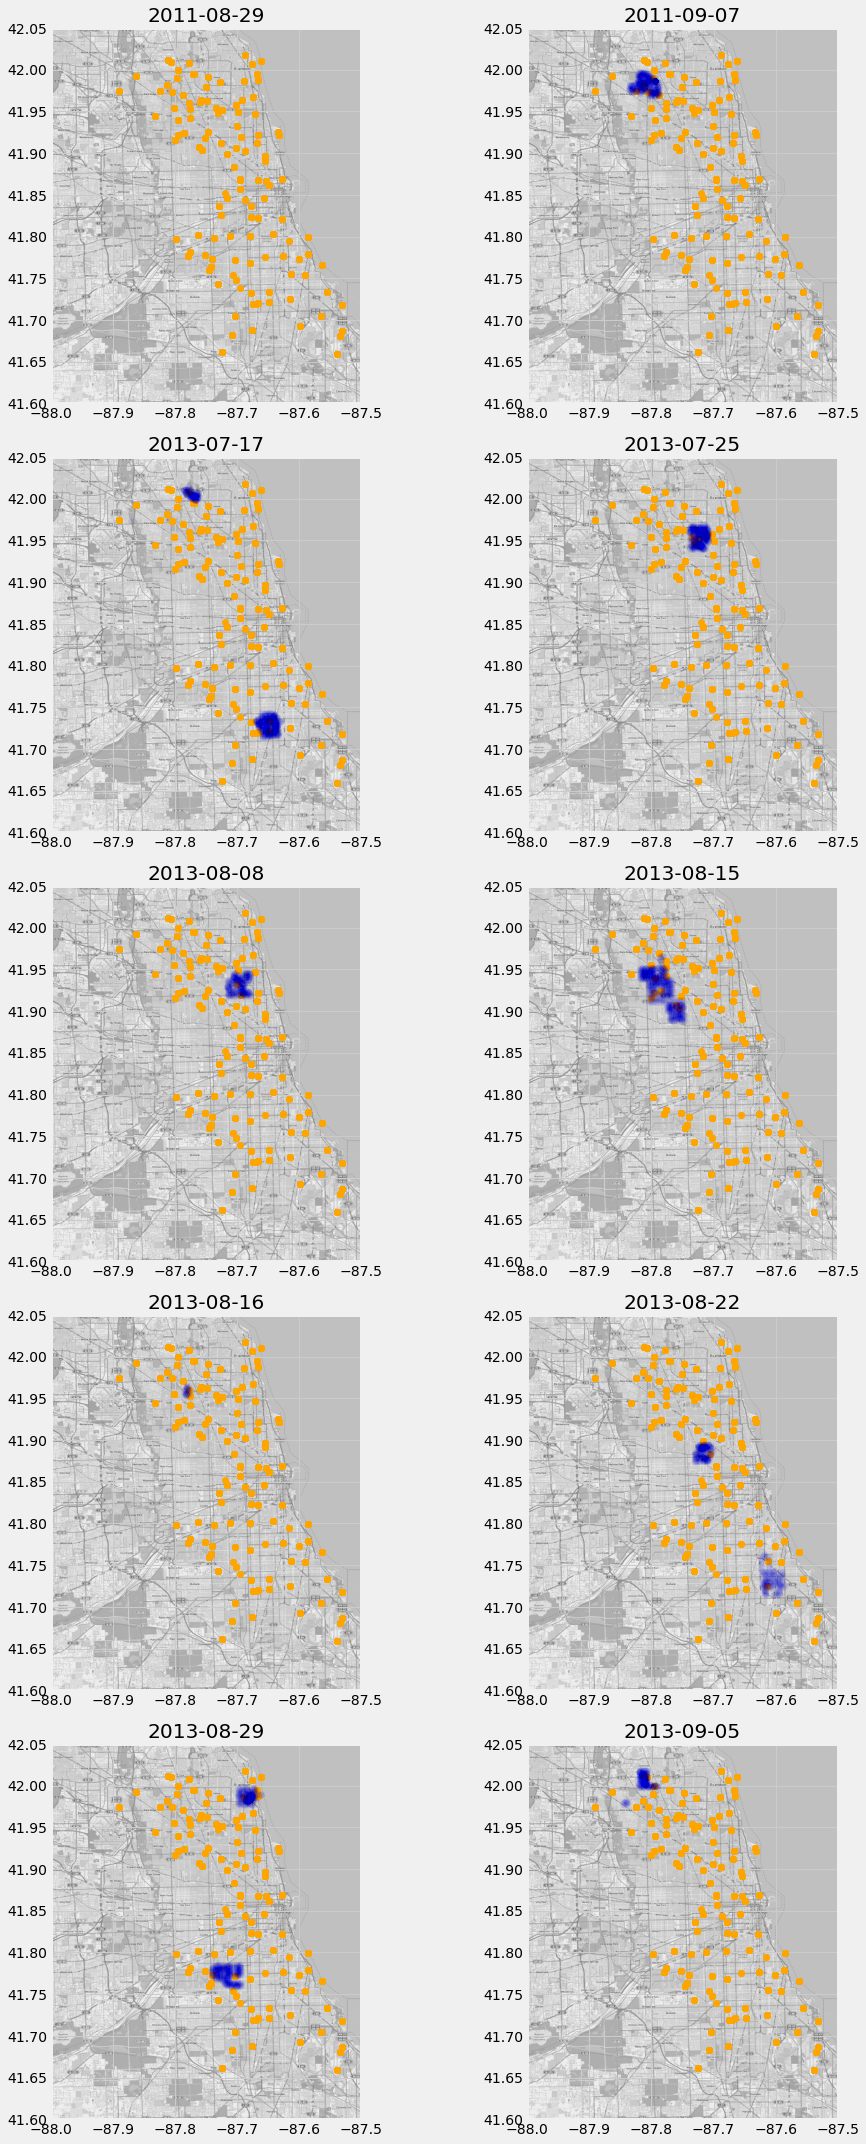

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

for date, axis in zip(spray_dates, chain(*ax)):
    axis.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

    spray_tmp = spray_by_date[date]
    
    axis.scatter(train[trap_mask][:,2], train[trap_mask][:,3], marker='o',\
                color='orange', label='Trap Locations')
    axis.scatter(spray_tmp[:,1], spray_tmp[:,2], marker='o',\
                color='blue', label='Spray Locations', alpha=.01)
    axis.set_title(date)
plt.tight_layout()

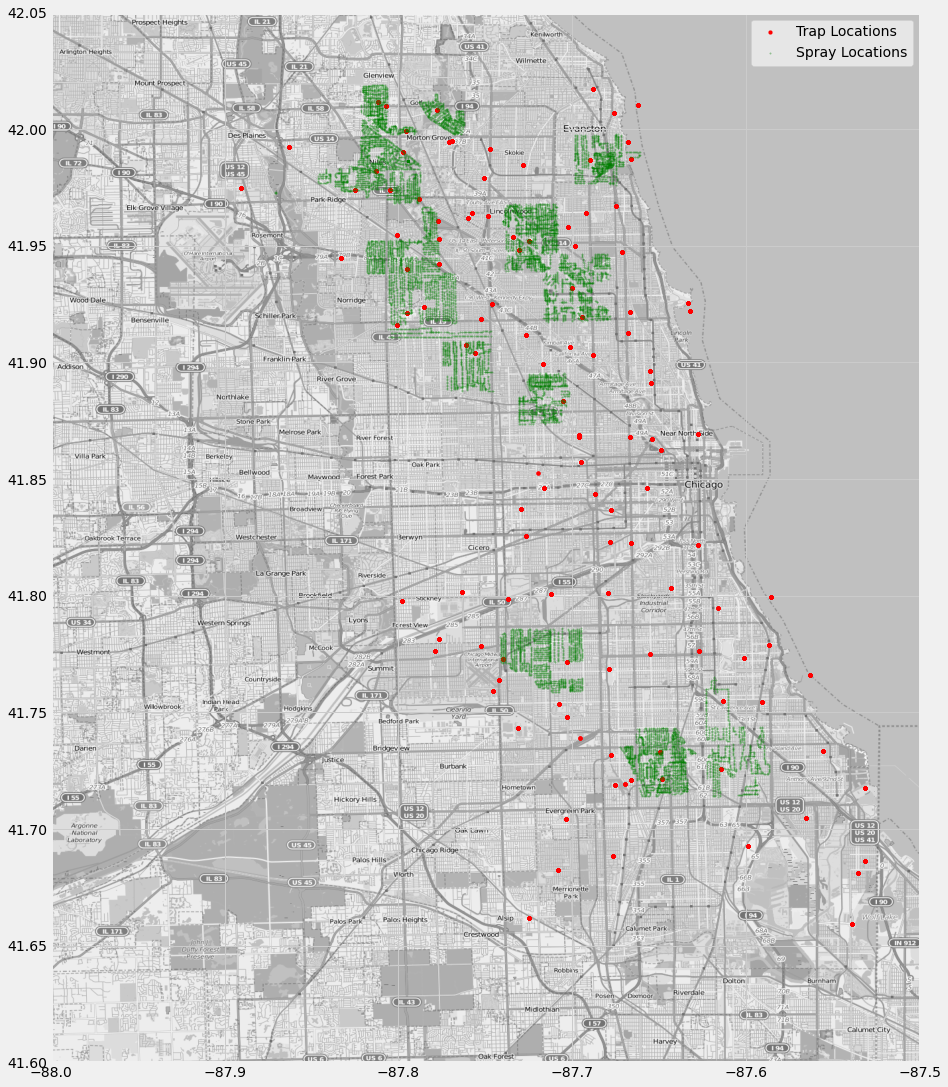

In [ ]:
spray_plot = spray[['Date','Longitude', 'Latitude']].values
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.05)

plt.figure(figsize=(14,18))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

trap_mask = (train[:,2] >= lon_lat_box[0])
trap_mask = (train[:,2] <= lon_lat_box[1]) & trap_mask
trap_mask = (train[:,3] >= lon_lat_box[2]) & trap_mask
trap_mask = (train[:,3] <= lon_lat_box[3]) & trap_mask

spray_mask = (spray_plot[:,1] >= lon_lat_box[0])
spray_mask = (spray_plot[:,1] <= lon_lat_box[1]) & spray_mask
spray_mask = (spray_plot[:,2] >= lon_lat_box[2]) & spray_mask
spray_mask = (spray_plot[:,2] <= lon_lat_box[3]) & spray_mask

plt.scatter(train[trap_mask][:,2], train[trap_mask][:,3], marker='x',\
            color='red', label='Trap Locations', s=3)
plt.scatter(spray_plot[spray_mask][:,1], spray_plot[spray_mask][:,2], marker='o',\
            color='green', label='Spray Locations', alpha=.3, s=2)

plt.legend()

### Spray and Traps (by years)
---

In [ ]:
years_array = map(lambda date:date[:4], spray_plot[:,0])
years_array = np.array([*years_array])

years = set(years_array)
years = list(years)
years.sort()

In [ ]:
spray_by_year = {}

for year in years:
    spray_mask_tmp = spray_mask & (years_array == year)
    spray_by_year[year] = spray_plot[spray_mask_tmp]

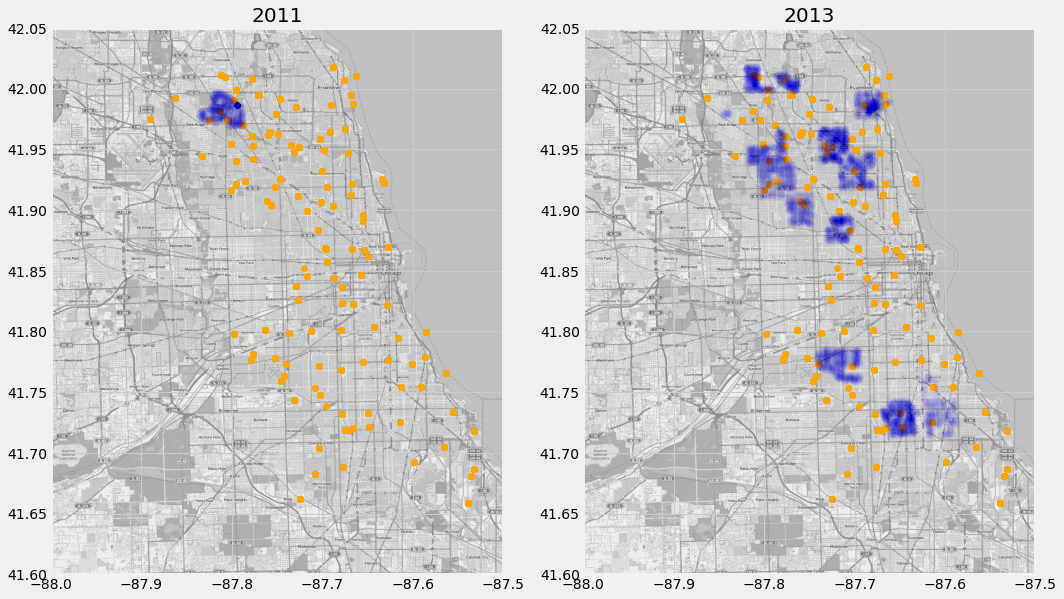

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

for year, axis in zip(spray_by_year, ax):
    axis.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

    spray_tmp = spray_by_year[year]
    
    axis.scatter(train[trap_mask][:,2], train[trap_mask][:,3], marker='o',\
                color='orange', label='Trap Locations')
    axis.scatter(spray_tmp[:,1], spray_tmp[:,2], marker='o',\
                color='blue', label='Spray Locations', alpha=.01)
    axis.set_title(year)
plt.tight_layout()

## Spray and train dataset
---

In [ ]:
clean_train = pd.read_csv('../assets/cleaned_train.csv')
clean_train['Date'] = pd.to_datetime(clean_train['Date'])

In [ ]:
clean_train.shape

(7370, 9)

In [ ]:
spray1.shape

(14294, 7)

In [ ]:
# Find the common columns for both train and spray
set(clean_train.columns).intersection(set(spray1.columns))

{'Date', 'Latitude', 'Longitude'}

In [ ]:
# Sort the time for clean_train and spray1 before merging
clean_train = clean_train.sort_values('Date')
spray1 = spray1.sort_values('Date')

#### Comparison of Dates of Spray against Data of Train
---

In [ ]:
# Unique dates for clean_train
clean_train['Date'].unique()

array(['2007-05-29T00:00:00.000000000', '2007-06-05T00:00:00.000000000',
       '2007-06-26T00:00:00.000000000', '2007-06-29T00:00:00.000000000',
       '2007-07-02T00:00:00.000000000', '2007-07-11T00:00:00.000000000',
       '2007-07-18T00:00:00.000000000', '2007-07-19T00:00:00.000000000',
       '2007-07-25T00:00:00.000000000', '2007-07-27T00:00:00.000000000',
       '2007-08-01T00:00:00.000000000', '2007-08-02T00:00:00.000000000',
       '2007-08-03T00:00:00.000000000', '2007-08-07T00:00:00.000000000',
       '2007-08-08T00:00:00.000000000', '2007-08-09T00:00:00.000000000',
       '2007-08-15T00:00:00.000000000', '2007-08-16T00:00:00.000000000',
       '2007-08-17T00:00:00.000000000', '2007-08-21T00:00:00.000000000',
       '2007-08-22T00:00:00.000000000', '2007-08-24T00:00:00.000000000',
       '2007-08-28T00:00:00.000000000', '2007-09-04T00:00:00.000000000',
       '2007-09-05T00:00:00.000000000', '2007-09-06T00:00:00.000000000',
       '2007-09-12T00:00:00.000000000', '2007-09-18

In [ ]:
# Unique dates for spray1
spray1['Date'].unique()

array(['2011-08-29T00:00:00.000000000', '2011-09-07T00:00:00.000000000',
       '2013-07-17T00:00:00.000000000', '2013-07-25T00:00:00.000000000',
       '2013-08-08T00:00:00.000000000', '2013-08-15T00:00:00.000000000',
       '2013-08-16T00:00:00.000000000', '2013-08-22T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
# Merge clean_train and spray1 using inner join of Date
train_spray_df = clean_train.merge(spray1, how='inner', on = 'Date')
train_spray_df

,Date,Species,Block,Street,Trap,Latitude_x,Longitude_x,WnvPresent,NumMosquitos_sum,Time,Latitude_y,Longitude_y,7Daysfterspray,14Daysfterspray,21Daysfterspray
0,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:26:31 PM,41.950092,-87.717378,2013-08-01,2013-08-08,2013-08-15
1,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:26:41 PM,41.949707,-87.717460,2013-08-01,2013-08-08,2013-08-15
2,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:25:41 PM,41.950173,-87.714575,2013-08-01,2013-08-08,2013-08-15
3,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:26:21 PM,41.950105,-87.716938,2013-08-01,2013-08-08,2013-08-15
4,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:26:11 PM,41.950113,-87.716243,2013-08-01,2013-08-08,2013-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142886,2013-08-29,CULEX RESTUANS,45,N CAMPBELL AVE,T220,41.963976,-87.691810,0,1.0,9:46:43 PM,41.781348,-87.721305,2013-09-05,2013-09-12,2013-09-19
1142887,2013-08-29,CULEX RESTUANS,45,N CAMPBELL AVE,T220,41.963976,-87.691810,0,1.0,9:47:33 PM,41.783148,-87.722127,2013-09-05,2013-09-12,2013-09-19
1142888,2013-08-29,CULEX RESTUANS,45,N CAMPBELL AVE,T220,41.963976,-87.691810,0,1.0,9:46:53 PM,41.781333,-87.722125,2013-09-05,2013-09-12,2013-09-19
1142889,2013-08-29,CULEX RESTUANS,45,N CAMPBELL AVE,T220,41.963976,-87.691810,0,1.0,9:46:23 PM,41.781368,-87.719870,2013-09-05,2013-09-12,2013-09-19


In [ ]:
train_spray_df.columns

Index(['Date', 'Species', 'Block', 'Street', 'Trap', 'Latitude_x',
       'Longitude_x', 'WnvPresent', 'NumMosquitos_sum', 'Time', 'Latitude_y',
       'Longitude_y', '7Daysfterspray', '14Daysfterspray', '21Daysfterspray'],
      dtype='object')

In [ ]:
train_spray_df.head()

,Date,Species,Block,Street,Trap,Latitude_x,Longitude_x,WnvPresent,NumMosquitos_sum,Time,Latitude_y,Longitude_y,7Daysfterspray,14Daysfterspray,21Daysfterspray
0,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:26:31 PM,41.950092,-87.717378,2013-08-01,2013-08-08,2013-08-15
1,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:26:41 PM,41.949707,-87.717460,2013-08-01,2013-08-08,2013-08-15
2,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:25:41 PM,41.950173,-87.714575,2013-08-01,2013-08-08,2013-08-15
3,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:26:21 PM,41.950105,-87.716938,2013-08-01,2013-08-08,2013-08-15
4,2013-07-25,CULEX RESTUANS,79,S CHICAGO AVE,T083,41.754292,-87.590773,0,6.0,10:26:11 PM,41.950113,-87.716243,2013-08-01,2013-08-08,2013-08-15


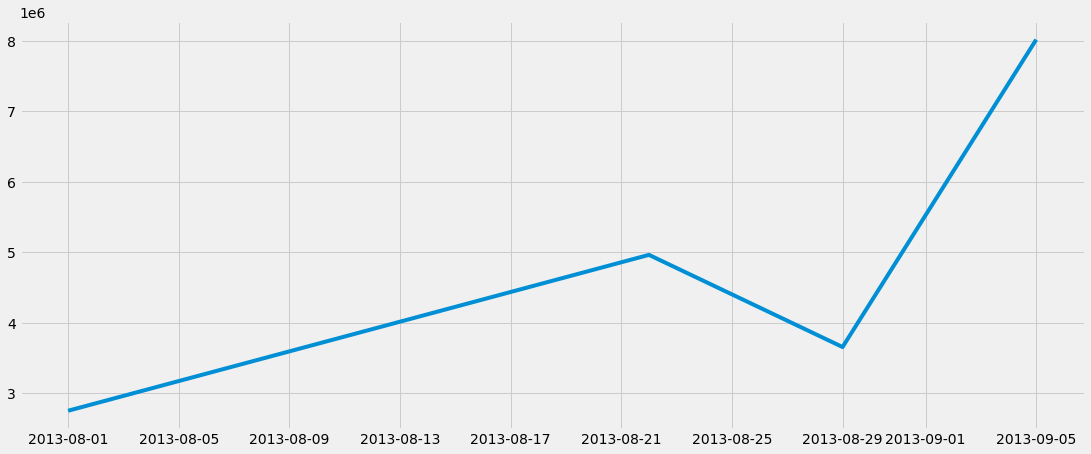

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(train_spray_df.groupby('7Daysfterspray')['NumMosquitos_sum'].sum());